# Evaluation Project 8
Space Server Dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('spaceserver.csv')
ds

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
#lets check the columns
ds.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

#### Column descriptions:-

objid = Object Identifier

ra = J2000 Right Ascension (r-band)

dec = J2000 Declination (r-band)

u = better of DeV/Exp magnitude fit

g = better of DeV/Exp magnitude fit

r = better of DeV/Exp magnitude fit

i = better of DeV/Exp magnitude fit

z = better of DeV/Exp magnitude fit

run = Run Number

rereun = Rerun Number

camcol = Camera column

field = Field number

specobjid = Object Identifier

class = object class

redshift = Final Redshift

plate = plate number

mjd = MJD of observation

fiberid = fiber ID

In [4]:
#lets check the datatypes of each columns
ds.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [5]:
#find the different class objects
ds['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [6]:
#All attributes are in float and integer datatypes except the target variable.lets map it into integer values
ds['class']=ds['class'].replace({'STAR': 1, 'GALAXY': 2, 'QSO': 3})

In [7]:
#lets find the counts of class column
ds['class'].value_counts()

2    4998
1    4152
3     850
Name: class, dtype: int64

In [8]:
#let us find whether there are any missing values in the data
ds.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

There are no missing values.

In [9]:
#lets check for summary statistics
ds.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,1.669800,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.625465,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,1.000000,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,1.000000,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,2.000000,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,2.000000,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,3.000000,5.353854,8410.000000,57481.000000,1000.000000


### Observations:-

1. The objid and rerun has the same value for mean,min,median,25th & 75th percentiles and max value.Hence the field consists of a constant value throughout.
2. There is a large gap between the 75th percentile and max values in the columns field,redshift,plate,fiberid.Hence there may be certain outliers.

In [10]:
#lets check the correlation
ds.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,1.442555e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,4.118918e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,9.124866e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,2.845415e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,3.573522e-01,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,2.786783e-01,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,2.053670e-01,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,1.494443e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,1.006273e-01,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The rerun attribute shows nan values, which means that it has no correlation with any other data ,hence we can drop it.

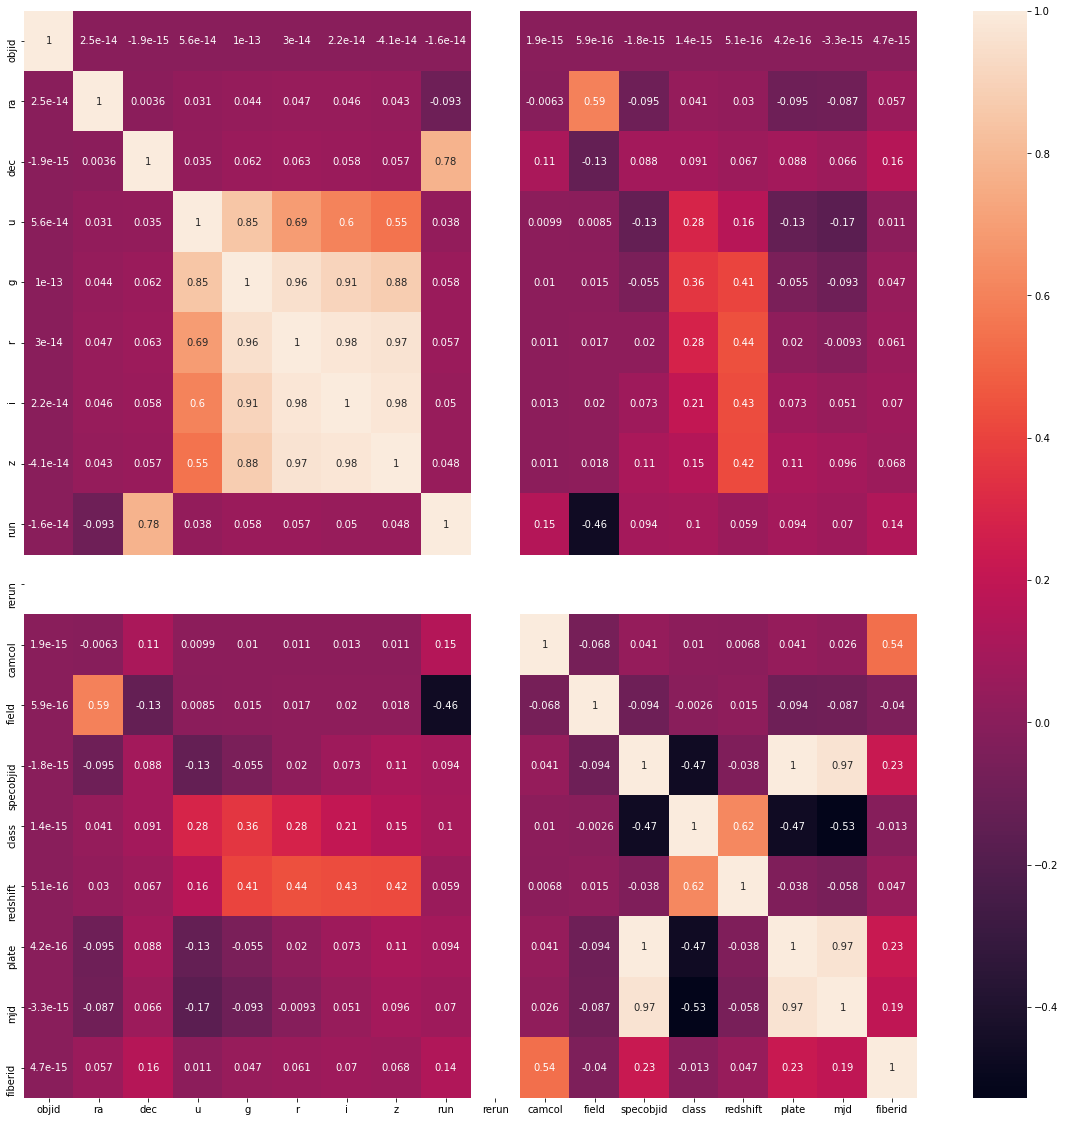

In [11]:
#lets visualize correlation graphically to understand better
plt.figure(figsize=(20,20))
sns.heatmap(ds.corr(),annot=True)
plt.show()

1. Our target varibale shows strict negative correlation with:-mjd,plate and spaceobjid and strong positive correlation with redshift.
2. The objid is showing exponential relation with our target hence we can neglect it while training. 

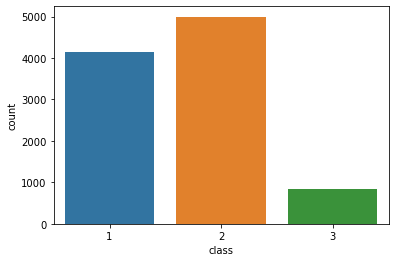

2    4998
1    4152
3     850
Name: class, dtype: int64


In [12]:
#checking the counts for different classes
plt.figure()
sns.countplot(x='class',data=ds)
plt.show()
print(ds['class'].value_counts())

The most number of objects identified are galaxy and the least identified are quasar.

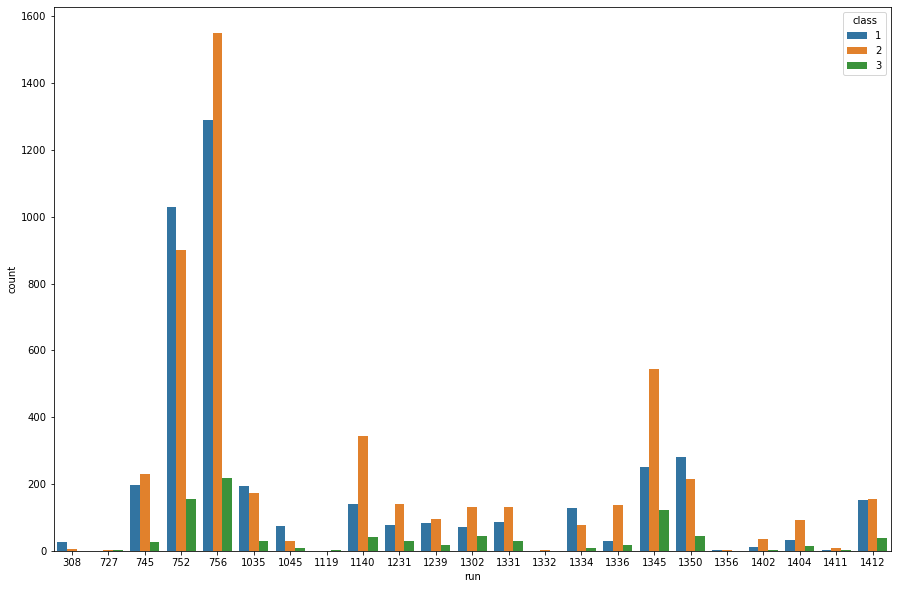

class  run 
1      756     1291
       752     1029
       1350     280
       1345     251
       745      196
               ... 
3      1334       9
       1402       3
       727        1
       1119       1
       1411       1
Name: run, Length: 62, dtype: int64


In [13]:
plt.figure(figsize=(15,10))
sns.countplot(x='run',hue='class',data=ds)
plt.show()
print(ds.groupby('class')['run'].value_counts())

for run number 756 maximum number of objects are identified and for run number 1119 and 1132 least number of objects are identified.

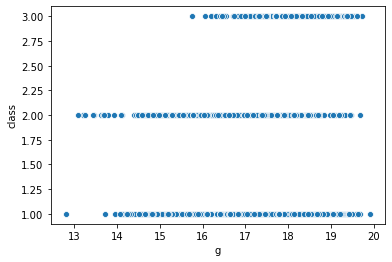

In [14]:
sns.scatterplot(x='g',y='class',data=ds)

For an object to be quasar the g-fit number should be greater than 15.5. All objects with g-fit greater than 15.5 are not always quasar

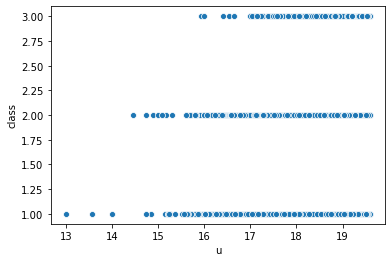

In [15]:
sns.scatterplot(x='u',y='class',data=ds)

Objects with u-fit number below than 14 could not be galaxy or quasar.

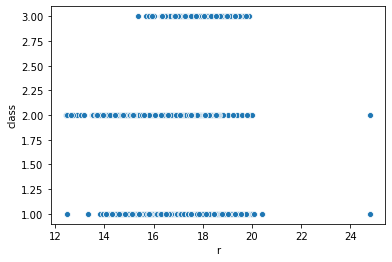

In [16]:
sns.scatterplot(x='r',y='class',data=ds)

Objects with r-fit number beyond 21 cannot be quasar and there are only two objects identified beyond it as galaxy or star. So there is a 50% likely chances of a new object to be identified beyond this limit to be a star or galaxy.  

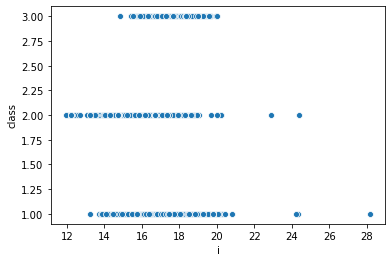

In [17]:
sns.scatterplot(x='i',y='class',data=ds)

Majority of objects identified are in the range 12-21, and for quasar it has the similar condition met with r-number.

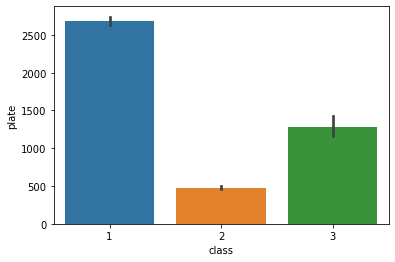

class
1    2680.613198
2     477.680672
3    1285.305882
Name: plate, dtype: float64


In [18]:
plt.figure()
sns.barplot(x='class',y='plate',data=ds)
plt.show()
print(ds.groupby('class')['plate'].mean())

The galaxy has the lowest mean value of plate number than the other categories

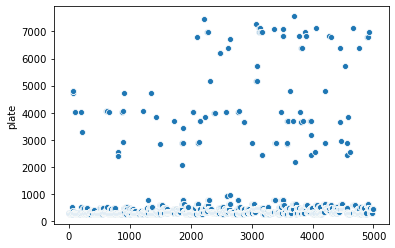

In [19]:
#lets seperate the galaxy objects from the dataframe 
ds_galaxy=ds[ds['class']==2]
#lets find the relationship with plate number
sns.scatterplot(x=range(0,4998),y='plate',data=ds_galaxy)

Majority of the objects identified are having plate number below 1000.

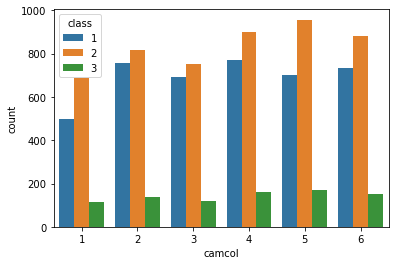

class  camcol
1      4         772
       2         758
       6         735
       5         700
       3         690
       1         497
2      5         957
       4         901
       6         883
       2         818
       3         752
       1         687
3      5         170
       4         161
       6         151
       2         136
       3         118
       1         114
Name: camcol, dtype: int64


In [20]:
plt.figure()
sns.countplot(x='camcol',hue='class',data=ds)
plt.show()
print(ds.groupby('class')['camcol'].value_counts())

The maximum number of objects identified is in camera column 5 as GALAXY and the least objects identified is in camera column 1 as QUASAR.

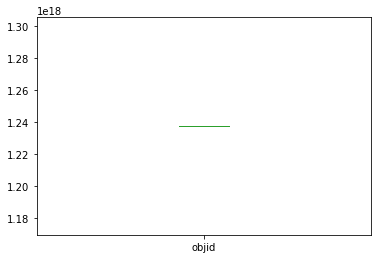

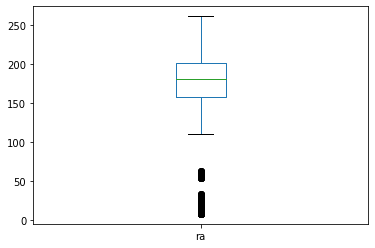

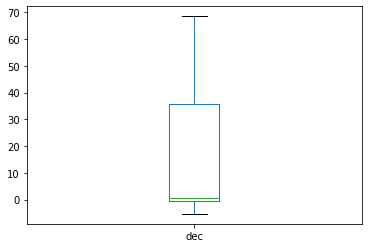

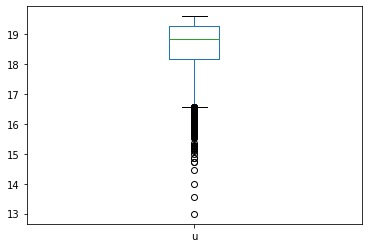

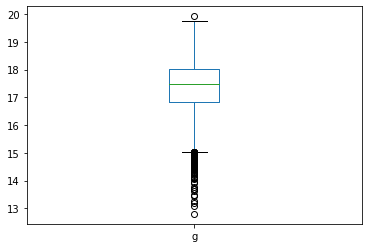

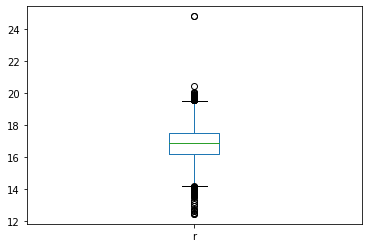

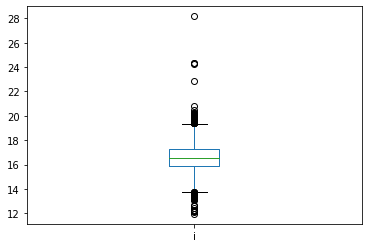

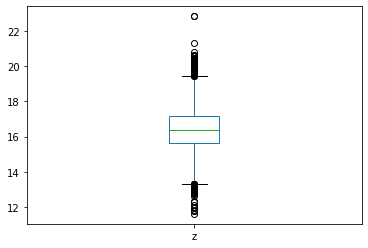

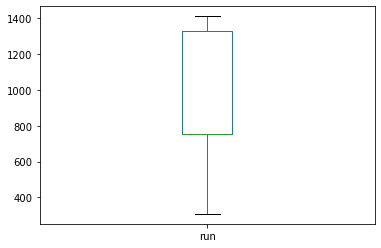

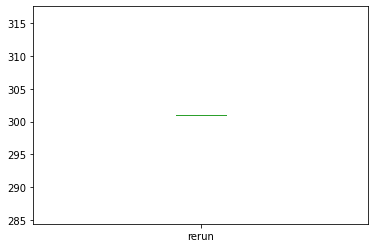

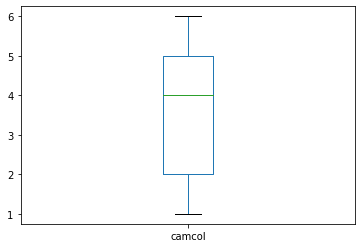

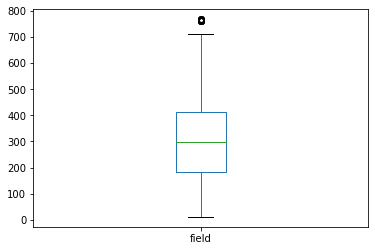

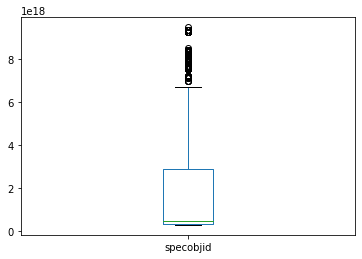

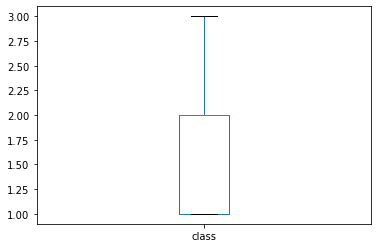

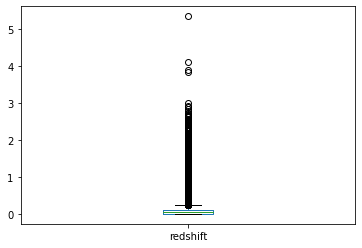

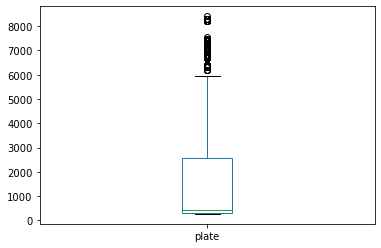

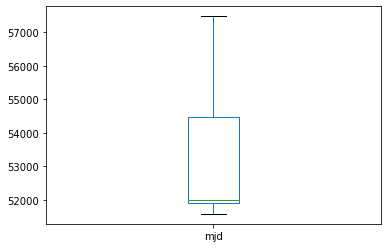

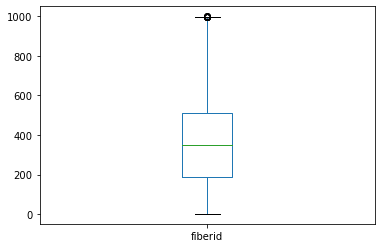

In [21]:
#lets check for outliers using boxplot
plt.figure()
for i in ds.columns:
    ds[i].plot.box()
    plt.show()    

We can see that there are outliers present in ra,u,g,r,i,z,spaceobjid,redshift,plate and fiberid.Hence we have to treat them.

In [22]:
#before treating the outliers lets drop the columns objid and rerun as they have no significance with our target variable.
ds.drop(columns=['objid','rerun'],axis=1,inplace=True)
#removing the outliers
from scipy.stats import zscore
z_score=abs(zscore(ds))
print(ds.shape)

ds_final=ds.loc[(z_score<3).all(axis=1)]
print(ds_final.shape)

(10000, 16)
(8698, 16)


In [23]:
#saving the dataframe after treating outliers
ds=ds_final
#checking the shape
ds.shape

(8698, 16)

In [24]:
#lets check for skewness()
ds.skew()

ra          -0.130951
dec          1.212911
u           -0.981103
g           -0.528033
r           -0.153454
i            0.055966
z            0.167256
run          0.518602
camcol      -0.141193
field        0.220032
specobjid    1.320102
class        0.192726
redshift     4.951700
plate        1.320088
mjd          0.963989
fiberid      0.065374
dtype: float64

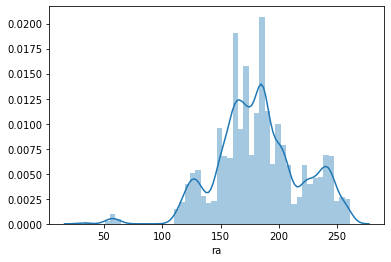

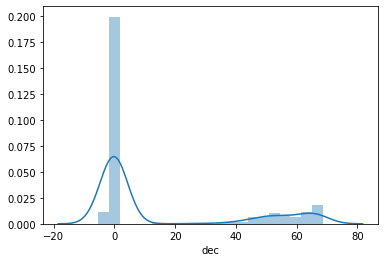

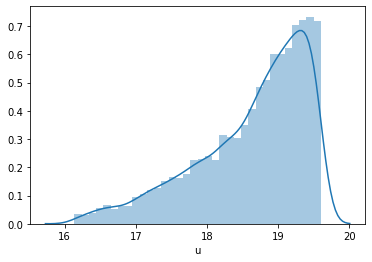

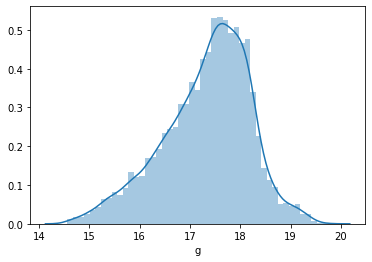

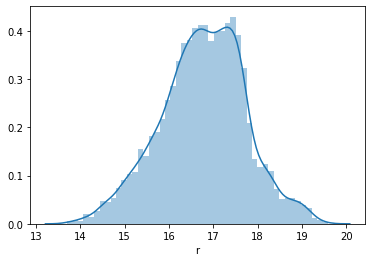

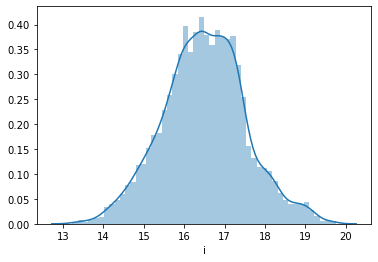

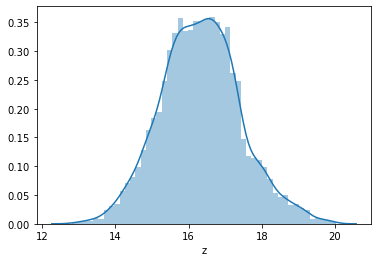

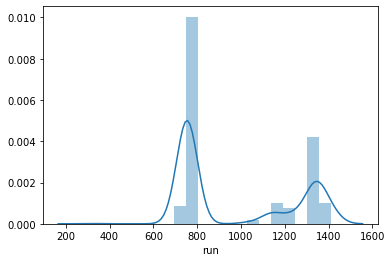

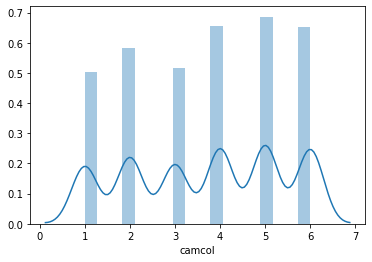

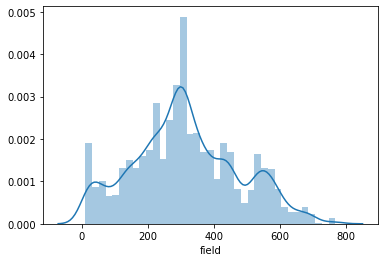

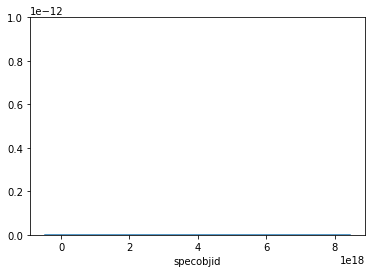

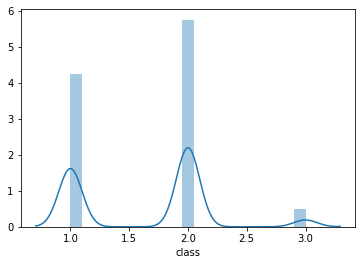

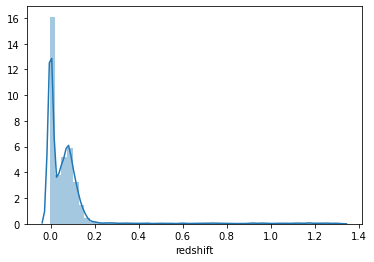

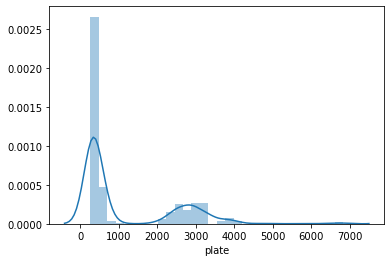

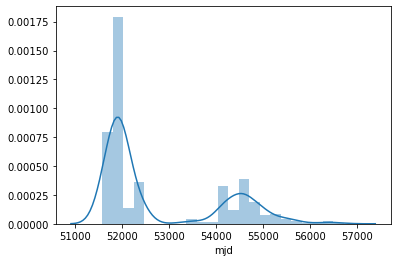

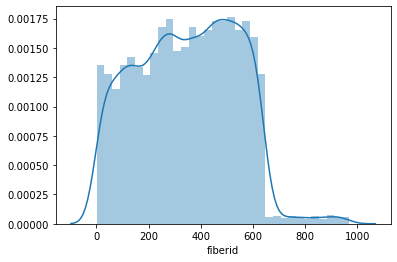

In [25]:
#lets visualize graphically
for i in ds.columns:
    plt.figure()
    sns.distplot(ds[i])
    plt.show()

we can see there is a negative as well as positive skewness.hence we need to treat them.

In [26]:
for col in ds.columns:
    if ds[col].skew()>0.55:
        ds[col]=np.log1p(ds[col])               #log for treating positive skewness
    if ds[col].skew()<-0.55:
        ds[col]=np.cbrt(ds[col])               #cbrt for treating negative skewness   

In [27]:
#checking the skewness
ds.skew()

ra          -0.130951
dec          0.255429
u           -1.037995
g           -0.528033
r           -0.153454
i            0.055966
z            0.167256
run          0.518602
camcol      -0.141193
field        0.220032
specobjid    0.751620
class        0.192726
redshift     4.195758
plate        0.752026
mjd          0.949578
fiberid      0.065374
dtype: float64

skewness is reduced to an extent and now lets trainnthe model.

In [28]:
#seperating the target variable
y=ds['class']
y.head()

0    1
1    1
2    2
3    1
4    1
Name: class, dtype: int64

In [29]:
#seperating input variables
ds_x=ds.drop(columns='class',axis=1)
ds_x.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,183.531326,0.085896,2.690412,17.04240,15.94699,15.50342,15.22531,752,4,267,42.760890,-0.000009,8.103797,10.913687,491
1,183.598371,0.126884,2.652522,17.21449,16.67637,16.48922,16.39150,752,4,267,40.435419,-0.000055,5.780744,10.851587,541
2,183.680207,0.118836,2.686211,18.19169,17.47428,17.08732,16.80125,752,4,268,40.317277,0.116103,5.662960,10.859460,513
3,183.870529,0.048705,2.609304,16.60272,16.16116,15.98233,15.90438,752,4,269,42.760892,-0.000111,8.103797,10.913687,510
4,183.883288,0.097632,2.598730,16.26342,16.43869,16.55492,16.61326,752,4,269,42.760892,0.000590,8.103797,10.913687,512


In [30]:
# we need to standardize the input data.we use standard scaler for the purpose.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(ds_x)
x=pd.DataFrame(x,columns=ds_x.columns)

In [31]:
x

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,0.022563,-0.436433,1.059046,-0.332856,-0.855097,-0.969819,-1.007660,-0.790307,0.197332,-0.304679,1.573357,-0.553789,1.573507,1.665137,0.754994
1,0.024421,-0.417249,0.053297,-0.134171,-0.098144,-0.009474,0.055512,-0.790307,0.197332,-0.304679,-0.731864,-0.554174,-0.731988,-0.891468,1.016814
2,0.026689,-0.421015,0.947540,0.994046,0.729930,0.573183,0.429065,-0.790307,0.197332,-0.298398,-0.848978,0.418754,-0.848881,-0.567327,0.870195
3,0.031964,-0.453840,-1.093850,-0.840484,-0.632831,-0.503275,-0.388577,-0.790307,0.197332,-0.292117,1.573359,-0.554640,1.573507,1.665137,0.854486
4,0.032318,-0.430940,-1.374529,-1.232219,-0.344809,0.054530,0.257682,-0.790307,0.197332,-0.292117,1.573359,-0.548770,1.573507,1.665137,0.864958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,-1.422261,1.377541,-1.053887,-1.506087,-1.672305,-1.737999,-1.816223,1.360326,-0.394324,-0.970460,-0.410056,-0.101172,-0.410388,-0.683025,-0.512213
8694,-1.424548,1.377593,0.247640,0.161438,0.149590,0.179351,0.159624,1.360326,-0.394324,-0.970460,-0.410058,-0.325810,-0.410388,-0.683025,-0.527922
8695,-1.424834,1.378766,-0.440915,0.124446,0.317548,0.212045,0.335821,1.360326,-0.394324,-0.964179,-0.410068,0.378842,-0.410388,-0.683025,-0.622177
8696,-1.420093,1.379492,0.328961,0.669608,0.789334,0.841588,0.737782,1.360326,-0.394324,-0.957898,-0.410068,-0.437108,-0.410388,-0.683025,-0.616941


In [32]:
#after standardizing lets look for null values
x.isnull().sum()

ra              0
dec          1069
u               0
g               0
r               0
i               0
z               0
run             0
camcol          0
field           0
specobjid       0
redshift        0
plate           0
mjd             0
fiberid         0
dtype: int64

In [33]:
#replace the null values with the column mean.
x['dec']=x['dec'].replace(np.nan,x['dec'].mean())

In [34]:
x

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,0.022563,-0.436433,1.059046,-0.332856,-0.855097,-0.969819,-1.007660,-0.790307,0.197332,-0.304679,1.573357,-0.553789,1.573507,1.665137,0.754994
1,0.024421,-0.417249,0.053297,-0.134171,-0.098144,-0.009474,0.055512,-0.790307,0.197332,-0.304679,-0.731864,-0.554174,-0.731988,-0.891468,1.016814
2,0.026689,-0.421015,0.947540,0.994046,0.729930,0.573183,0.429065,-0.790307,0.197332,-0.298398,-0.848978,0.418754,-0.848881,-0.567327,0.870195
3,0.031964,-0.453840,-1.093850,-0.840484,-0.632831,-0.503275,-0.388577,-0.790307,0.197332,-0.292117,1.573359,-0.554640,1.573507,1.665137,0.854486
4,0.032318,-0.430940,-1.374529,-1.232219,-0.344809,0.054530,0.257682,-0.790307,0.197332,-0.292117,1.573359,-0.548770,1.573507,1.665137,0.864958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,-1.422261,1.377541,-1.053887,-1.506087,-1.672305,-1.737999,-1.816223,1.360326,-0.394324,-0.970460,-0.410056,-0.101172,-0.410388,-0.683025,-0.512213
8694,-1.424548,1.377593,0.247640,0.161438,0.149590,0.179351,0.159624,1.360326,-0.394324,-0.970460,-0.410058,-0.325810,-0.410388,-0.683025,-0.527922
8695,-1.424834,1.378766,-0.440915,0.124446,0.317548,0.212045,0.335821,1.360326,-0.394324,-0.964179,-0.410068,0.378842,-0.410388,-0.683025,-0.622177
8696,-1.420093,1.379492,0.328961,0.669608,0.789334,0.841588,0.737782,1.360326,-0.394324,-0.957898,-0.410068,-0.437108,-0.410388,-0.683025,-0.616941


### Training the model 

In [35]:
#splitting the input and target variable into test and train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=47)
print(x_train.shape,'\t',x_test.shape)

(6784, 15) 	 (1914, 15)


In [36]:
print(y_train.shape,'\t',y_test.shape)

(6784,) 	 (1914,)


In [37]:
#importing libraries for models and error metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [38]:
#creating a for loop for all the models
model=[SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]
for m in model:
    m.fit(x_train,y_train)
    print('score of ',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Metrics:')
    print('Accuracy Score:',accuracy_score(y_test,predm))
    print('Confusion Matrix:',confusion_matrix(y_test,predm))
    print('Classification Report:',classification_report(y_test,predm))
    print('END OF THE MODEL----------------------------------- ')
    print('\n')

score of  SVC() is: 0.9784787735849056
Metrics:
Accuracy Score: 0.9806687565308255
Confusion Matrix: [[ 778    2    0]
 [  24 1019    3]
 [   0    8   80]]
Classification Report:               precision    recall  f1-score   support

           1       0.97      1.00      0.98       780
           2       0.99      0.97      0.98      1046
           3       0.96      0.91      0.94        88

    accuracy                           0.98      1914
   macro avg       0.97      0.96      0.97      1914
weighted avg       0.98      0.98      0.98      1914

END OF THE MODEL----------------------------------- 


score of  KNeighborsClassifier() is: 0.9436910377358491
Metrics:
Accuracy Score: 0.9310344827586207
Confusion Matrix: [[ 699   81    0]
 [  34 1010    2]
 [   1   14   73]]
Classification Report:               precision    recall  f1-score   support

           1       0.95      0.90      0.92       780
           2       0.91      0.97      0.94      1046
           3       0.97   

Of the above models dtc has the best accuracy score lets check for parameter tuning

In [39]:
#finding the best parameters for Decision Tree  Classifier using GridSearchcv
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'random_state':range(0,100)}
clf_class=GridSearchCV(estimator=dtc,param_grid=parameters,cv=10,scoring='accuracy')
clf_class.fit(x,y)
clf_class.best_params_

{'criterion': 'entropy', 'random_state': 98}

In [40]:
#final dtc model with best parameters:

dtc=DecisionTreeClassifier(criterion='entropy',random_state=98)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)

print('Accuracy score:',accuracy_score(y_test,preddtc))
print('Confusion matrix:\n',confusion_matrix(y_test,preddtc))
print('Classification report:\n',classification_report(y_test,preddtc))


Accuracy score: 0.9890282131661442
Confusion matrix:
 [[ 779    1    0]
 [   0 1040    6]
 [   0   14   74]]
Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       780
           2       0.99      0.99      0.99      1046
           3       0.93      0.84      0.88        88

    accuracy                           0.99      1914
   macro avg       0.97      0.94      0.96      1914
weighted avg       0.99      0.99      0.99      1914



By parameter tuning the score of dtc model has been improved from 0.986 to 0.989

## Ensemble methods 

In [41]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [42]:
#by using loop
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    print('score of ',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Metrics:')
    print('Accuracy Score:',accuracy_score(y_test,predm))
    print('Confusion Matrix:',confusion_matrix(y_test,predm))
    print('Classification Report:',classification_report(y_test,predm))
    print('END OF THE MODEL----------------------------------- ')
    print('\n')

score of  RandomForestClassifier() is: 1.0
Metrics:
Accuracy Score: 0.9932079414838035
Confusion Matrix: [[ 780    0    0]
 [   1 1040    5]
 [   0    7   81]]
Classification Report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00       780
           2       0.99      0.99      0.99      1046
           3       0.94      0.92      0.93        88

    accuracy                           0.99      1914
   macro avg       0.98      0.97      0.97      1914
weighted avg       0.99      0.99      0.99      1914

END OF THE MODEL----------------------------------- 


score of  AdaBoostClassifier() is: 0.9264445754716981
Metrics:
Accuracy Score: 0.9294670846394985
Confusion Matrix: [[ 736   44    0]
 [   2 1043    1]
 [   0   88    0]]
Classification Report:               precision    recall  f1-score   support

           1       1.00      0.94      0.97       780
           2       0.89      1.00      0.94      1046
           3       0.00 

In [43]:
#random forest classifier model
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
print('score:',rfc.score(x_train,y_train))
predrfc=rfc.predict(x_test)
print('\n')
print('Accuracy Score:',accuracy_score(y_test,predrfc))
print('Confusion Matrix:',confusion_matrix(y_test,predrfc))
print('Classification Report:',classification_report(y_test,predrfc))

score: 1.0


Accuracy Score: 0.9942528735632183
Confusion Matrix: [[ 780    0    0]
 [   1 1042    3]
 [   0    7   81]]
Classification Report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00       780
           2       0.99      1.00      0.99      1046
           3       0.96      0.92      0.94        88

    accuracy                           0.99      1914
   macro avg       0.99      0.97      0.98      1914
weighted avg       0.99      0.99      0.99      1914



In [44]:
#cross validating Random forest classifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,x,y,cv=10,scoring='accuracy')
print('Score:',score)
print('Mean Score:',score.mean())
print('Standard Deviation:',score.std())

Score: [0.9862069  0.98965517 0.98965517 0.99195402 0.98965517 0.98850575
 0.98505747 0.9816092  0.99309551 0.98849252]
Mean Score: 0.9883886882795657
Standard Deviation: 0.003186235671386077


The cross validation mean score is around 0.987.Thus the model is not under-fitted or over fitted.The Random Forest Classifier can be considered as the best model for this dataset. 

# Saving the model and result

In [45]:
#saving the RFC model
import joblib
joblib.dump(rfc,'Space_Server.pkl')

['Space_Server.pkl']

In [46]:
#saving the output to csv file
pred_OP=pd.DataFrame(predrfc)
pred_OP.to_csv('Space_Server_classification.csv')